In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

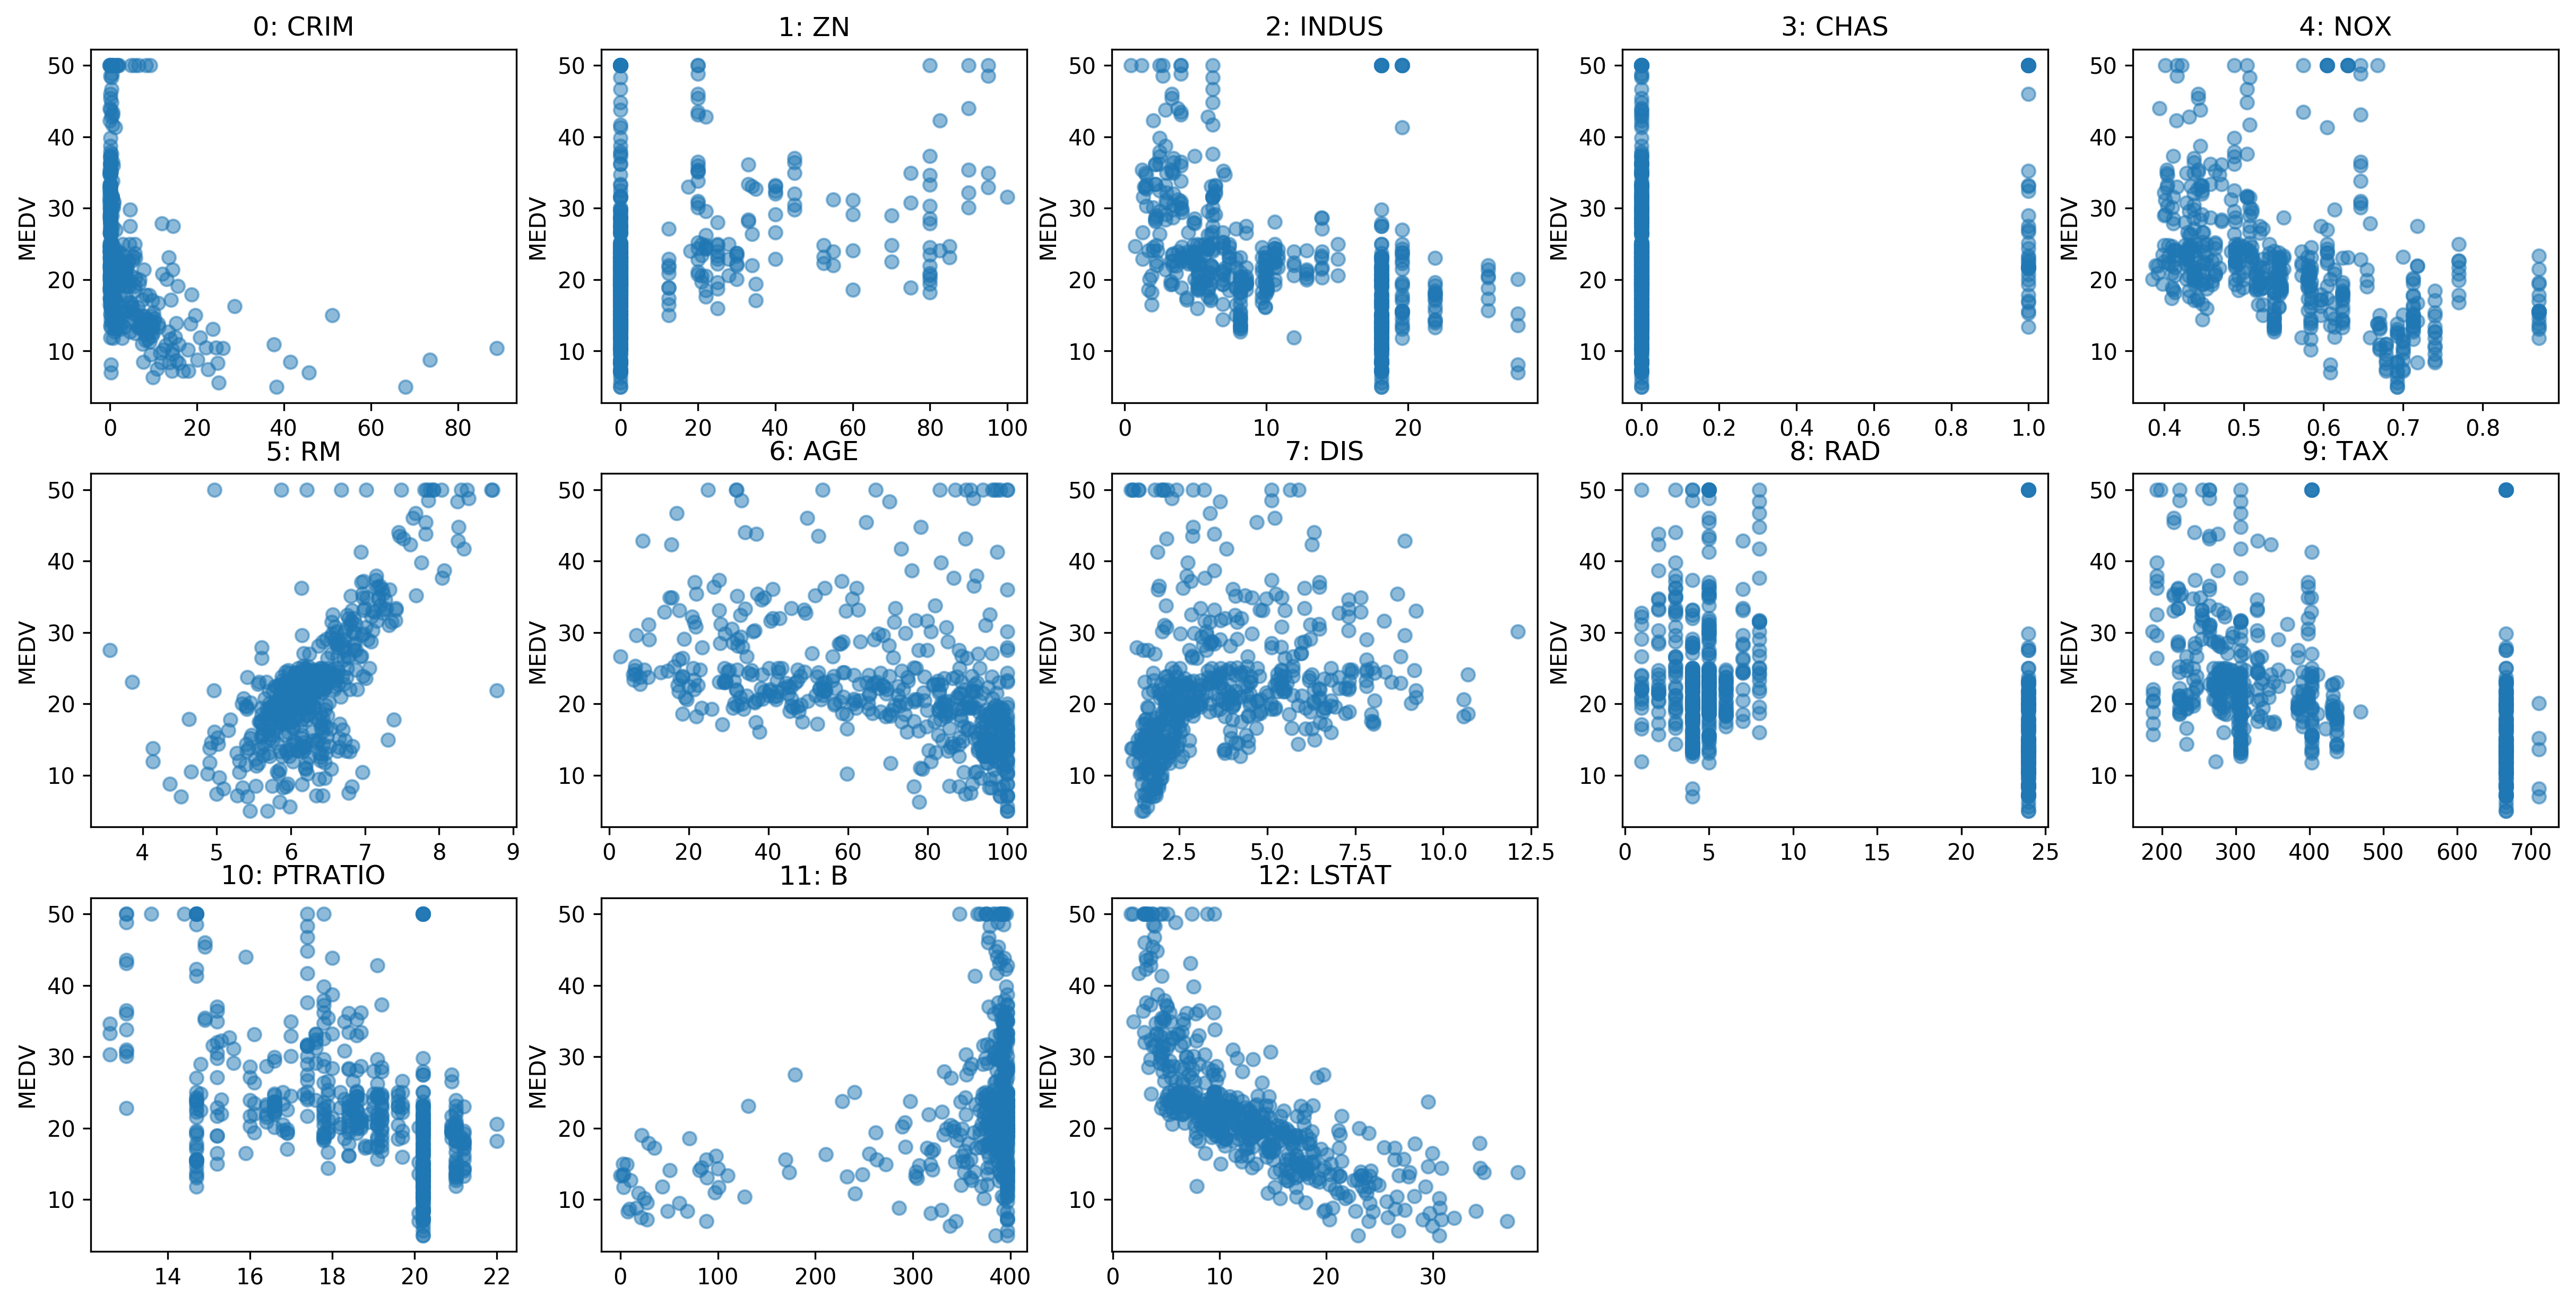

In [4]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

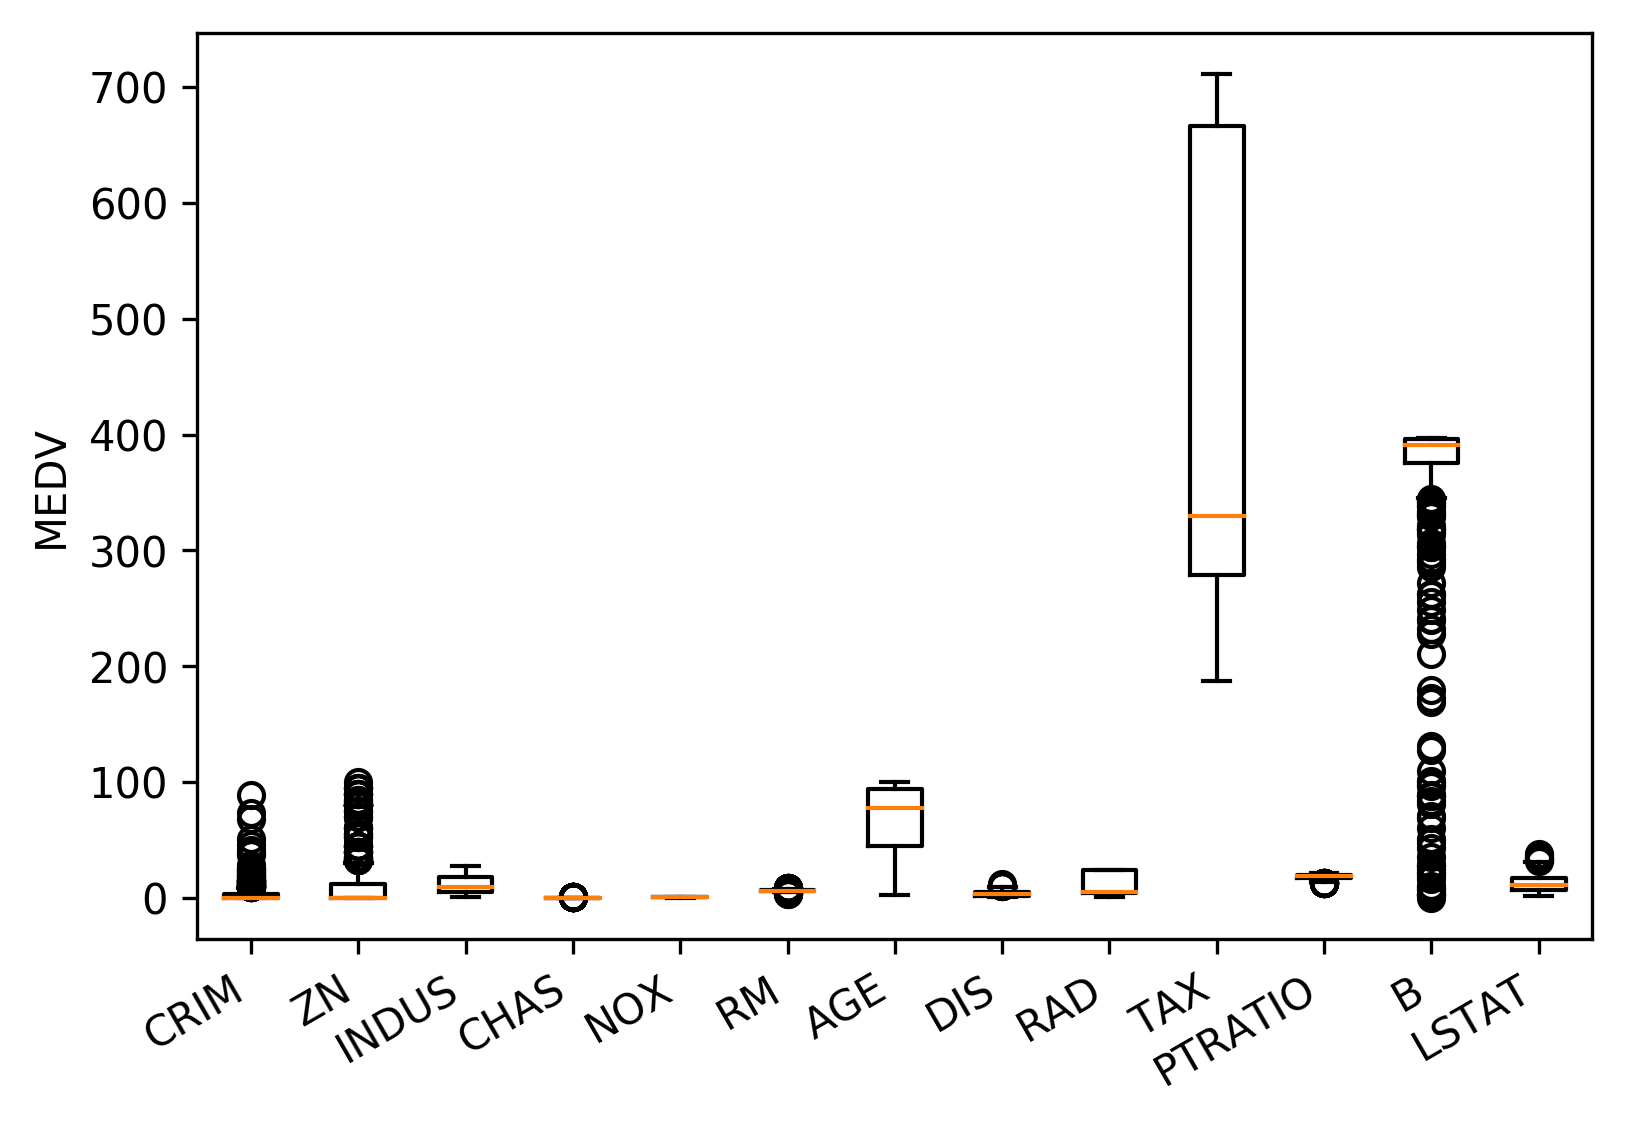

In [5]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=30, ha="right")
plt.ylabel("MEDV")

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [11]:
from sklearn.model_selection import cross_val_score

(0.71718655233314066, 0.12521148650633437)

In [13]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.49871865806668803, 0.14628381664585244)

In [14]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.74979219238995831, 0.10573244928159024)

# Categorical Variables

In [41]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhatten', 'Queens', 'Manhatten', 'Brooklyn', 'Brooklyn', 'Bronx']})
df

,boro,salary
0,Manhatten,103
1,Queens,89
2,Manhatten,142
3,Brooklyn,54
4,Brooklyn,63
5,Bronx,219


In [42]:
pd.get_dummies(df)

,salary,boro_Bronx,boro_Brooklyn,boro_Manhatten,boro_Queens
0,103,0.0,0.0,1.0,0.0
1,89,0.0,0.0,0.0,1.0
2,142,0.0,0.0,1.0,0.0
3,54,0.0,1.0,0.0,0.0
4,63,0.0,1.0,0.0,0.0
5,219,1.0,0.0,0.0,0.0


In [43]:
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': [0, 1,0, 2, 2, 3]})
df

,boro,salary
0,0,103
1,1,89
2,0,142
3,2,54
4,2,63
5,3,219


In [44]:
pd.get_dummies(df, columns=['boro'])

,salary,boro_0,boro_1,boro_2,boro_3
0,103,1.0,0.0,0.0,0.0
1,89,0.0,1.0,0.0,0.0
2,142,1.0,0.0,0.0,0.0
3,54,0.0,0.0,1.0,0.0
4,63,0.0,0.0,1.0,0.0
5,219,0.0,0.0,0.0,1.0


# Exercise
Apply dummy encoding and scaling to the "adult" dataset consisting of income data from the census.
Visualize the data beforehand.

In [ ]:
import pandas as pd
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
data = pd.read_csv(
    "adult.data", header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# this column is somewhat meaningless in this context
data = data.drop("fnlwgt", axis=1)
data.head()